This notebook demonstrates the use of the arbitrary one dimensional sampling.

In [1]:
from tdaspop import Sample1D
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=1.5)

/Users/rbiswas/soft/mypython3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rbiswas/soft/mypython3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Let us try to sample a Normal distribution with this method

## Do it with enough samples to look right

In [4]:
x = np.linspace(-5., 5., 1000)
calc_pdf = norm.pdf(x)
cdf_trapz = list(np.trapz(calc_pdf[:n], x[:n]) for n in np.arange(len(calc_pdf)))
cdf_numpy = norm.cdf(x)
cdf_simple = calc_pdf.cumsum()*(x[1] - x[0])


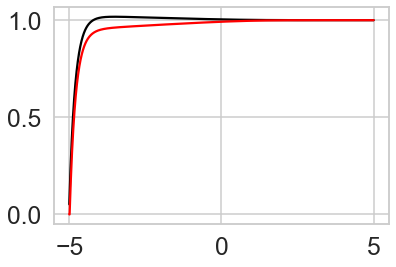

In [7]:
fig, ax = plt.subplots()
#ax, ay = axs
ax.plot(x, cdf_simple/cdf_numpy, color='k')
ax.plot(x, cdf_trapz/cdf_numpy, color='r')

The above plot shows the usual problems with the cdf calculation and sows that `cdf_simple` is quite good.

### Impact on samples

In [9]:
s1d = Sample1D(x, calc_pdf)

In [15]:
r = s1d.sample_pdf(size=1000000)

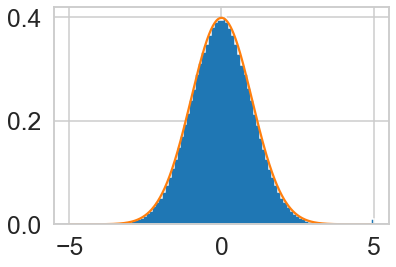

In [16]:
fig, ax = plt.subplots()
_ = ax.hist(r, bins=np.linspace(-5, 5, 100), density=True, 
            histtype='stepfilled')
ax.plot(x, norm.pdf(x))

## Smaller numbers of samples in Sample1D

In [25]:
xlow = np.linspace(-5., 5, 100)
pdf_low = norm.pdf(xlow)

In [26]:
s1d_low = Sample1D(xlow, pdf_low)

In [27]:
rlow = s1d_low.sample_pdf(size=1000000, rng=np.random.RandomState(2))

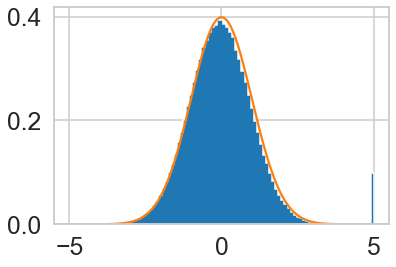

In [28]:
fig, ax = plt.subplots()
_ = ax.hist(rlow, bins=np.linspace(-5, 5, 100), density=True, 
            histtype='stepfilled')
ax.plot(x, norm.pdf(x))